# 各国幸福指数聚类
#### 顾翔，沈贝宁、那铭心、季诚
#### 本题由顾翔负责
---
## 运行环境
* python3
* 安装有pandas、scikit-learn、numpy库
* 运行软件：Anaconda、jupyter notebook

### 一、数据处理
* 读取数据

In [1]:
import pandas as pd
df=pd.read_csv('2016_world_happiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### 二、聚类
* 采用K-means++聚类，在初始化质心的过程中，选择相互距离尽可能远的样本作为初始质心
* 采用肘方法确定聚类数k
* 将地区转化为了01向量

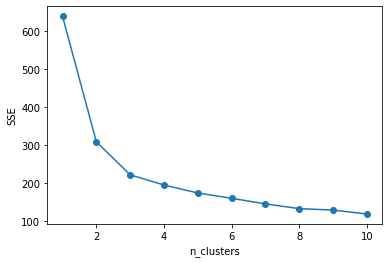

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import cluster

data=df.drop('Happiness Rank',axis=1)
data=data.drop('Happiness Score',axis=1)
data=data.drop('Country',axis=1)
data=pd.get_dummies(data)
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.show()

### 三、数据分析 
* 根据肘方法，选择k=6较为合适
* 查看整体情况

In [3]:
km = KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=5)
km.fit(data)
print('误差为:',km.inertia_)

labels = km.labels_
subDataDF1=df[["Country"]]
pd.DataFrame(labels, index=subDataDF1.Country,columns=['Country ID'])
num=pd.Series(labels).value_counts()
print('每个幸福得分分类群的数目为：\n',num)

for i in range(0,6):
    temp=pd.DataFrame()
    temp=temp.append(df[df['Country']=='Norway'])

误差为: 160.25012364724518
每个幸福得分分类群的数目为：
 0    45
4    34
5    23
1    19
3    18
2    18
dtype: int64


---
* 接下来对六个聚类，进行数据统计分析幸福状态与区位条件关系

In [4]:
subDataDF1=df[["Country"]]
res=pd.DataFrame(labels, index=subDataDF1.Country,columns=['Country ID'])

In [5]:
temp=res[res['Country ID']==0]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第一类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第一类地区为：
 Sub-Saharan Africa                 33
Central and Eastern Europe          4
Southern Asia                       3
Southeastern Asia                   2
Middle East and Northern Africa     2
Latin America and Caribbean         1
Name: Region, dtype: int64
平均幸福指数排名为：
 134.77777777777777


In [6]:
temp=res[res['Country ID']==1]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第二类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第二类地区为：
 Latin America and Caribbean    19
Name: Region, dtype: int64
平均幸福指数排名为：
 36.21052631578947


In [7]:
temp=res[res['Country ID']==2]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第三类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第三类地区为：
 Middle East and Northern Africa    6
Western Europe                     5
Southeastern Asia                  3
Eastern Asia                       3
Central and Eastern Europe         1
Name: Region, dtype: int64
平均幸福指数排名为：
 39.05555555555556


In [8]:
temp=res[res['Country ID']==3]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第四类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第四类地区为：
 Western Europe                     13
North America                       2
Australia and New Zealand           2
Middle East and Northern Africa     1
Name: Region, dtype: int64
平均幸福指数排名为：
 10.38888888888889


In [9]:
temp=res[res['Country ID']==4]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第五类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第五类地区为：
 Middle East and Northern Africa    10
Sub-Saharan Africa                  5
Latin America and Caribbean         4
Southeastern Asia                   4
Southern Asia                       4
Western Europe                      3
Eastern Asia                        3
Central and Eastern Europe          1
Name: Region, dtype: int64
平均幸福指数排名为：
 91.67647058823529


In [10]:
temp=res[res['Country ID']==5]
temp.head()
ans=pd.DataFrame()
for i in range(temp.shape[0]):
    ans=ans.append(df[df['Country']==temp.index.values[i]])
print('第六类地区为：\n',ans['Region'].value_counts())
print('平均幸福指数排名为：\n',ans['Happiness Rank'].mean())

第六类地区为：
 Central and Eastern Europe    23
Name: Region, dtype: int64
平均幸福指数排名为：
 71.30434782608695


---
* 从结果中不难发现，区位因素与幸福状态是强相关的，撒哈拉以南非洲资源匮乏，环境恶劣，政局动荡，经济落后，最不发达的国家集中于此；西欧北美经济发达，资源雄厚，政治民主，医疗优越，因此生活幸福指数最高国家集中于此。这在逻辑上也十分合理，发达国家/不发达国家有很大程度受到所在区位的气候地质环境水文生态的影响，当地国家的资源、地理位置，直接影响经济政治发展程度，从而影响人们生活幸福指数。